In [588]:
import yoptions as yo
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import QuantLib as ql
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint, Bounds
from scipy.optimize import minimize
import pyswarm
import seaborn as sns
from scipy.stats import kurtosis
import scipy.stats as stats
from scipy.stats import kstest, norm
from scipy.stats import skewtest



In [92]:
pip install seaborn

You should consider upgrading via the 'c:\Users\Ye\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [46]:
chainc1=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2023-08-18')
chainc2=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2023-08-25')
chainc3=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2023-09-01')
chainc4=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2023-09-22')
chainc5=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2023-10-20')
chainc6=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2023-11-17')
chainc7=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2023-12-15')
chainc8=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2024-01-19')
chainc9=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2024-03-15')
chainc10=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2024-06-21')
chainc11=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2024-09-20')
chainc12=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2025-01-17')
chainc13=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="c",risk_free_rate=None,expiration_date='2025-12-19')



chainp1=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2023-08-18')
chainp2=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2023-08-25')
chainp3=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2023-09-01')
chainp4=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2023-09-22')
chainp5=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2023-10-20')
chainp6=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2023-11-17')
chainp7=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2023-12-15')
chainp8=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2024-01-19')
chainp9=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2024-03-15')
chainp10=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2024-06-21')
chainp11=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2024-09-20')
chainp12=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2025-01-17')
chainp13=yo.get_chain_greeks_date(stock_ticker="SPY",dividend_yield=0,option_type="p",risk_free_rate=None,expiration_date='2025-12-19')

In [45]:
chainc1['maturity_date'],chainc1['type']=['2023-08-18','c']
chainc2['maturity_date'],chainc2['type']=['2023-08-25','c']
chainc3['maturity_date'],chainc3['type']=['2023-09-01','c']
chainc4['maturity_date'],chainc4['type']=['2023-09-22','c']
chainc5['maturity_date'],chainc5['type']=['2023-10-20','c']
chainc6['maturity_date'],chainc6['type']=['2023-11-17','c']
chainc7['maturity_date'],chainc7['type']=['2023-12-15','c']
chainc8['maturity_date'],chainc8['type']=['2024-01-19','c']
chainc9['maturity_date'],chainc9['type']=['2024-03-15','c']
chainc10['maturity_date'],chainc10['type']=['2024-06-21','c']
chainc11['maturity_date'],chainc11['type']=['2024-09-20','c']
chainc12['maturity_date'],chainc12['type']=['2025-01-17','c']
chainc13['maturity_date'],chainc13['type']=['2025-12-19','c']




chainp1['maturity_date'],chainp1['type']=['2023-08-18','p']
chainp2['maturity_date'],chainp2['type']=['2023-08-25','p']
chainp3['maturity_date'],chainp3['type']=['2023-09-01','p']
chainp4['maturity_date'],chainp4['type']=['2023-09-22','p']
chainp5['maturity_date'],chainp5['type']=['2023-10-20','p']
chainp6['maturity_date'],chainp6['type']=['2023-11-17','p']
chainp7['maturity_date'],chainp7['type']=['2023-12-15','p']
chainp8['maturity_date'],chainp8['type']=['2024-01-19','p']
chainp9['maturity_date'],chainp9['type']=['2024-03-15','p']
chainp10['maturity_date'],chainp10['type']=['2024-06-21','p']
chainp11['maturity_date'],chainp11['type']=['2024-09-20','p']
chainp12['maturity_date'],chainp12['type']=['2025-01-17','p']
chainp13['maturity_date'],chainp13['type']=['2025-12-19','p']
data=pd.concat([chainc1,chainc2,chainc3,chainc4,chainc5,chainc6,chainc7,chainc8,chainc9,chainc10,chainc11,chainc12,chainc13,chainp1,chainp2,chainp3,chainp4,chainp5,chainp6,chainp7,chainp8,chainp9,chainp10,chainp11,chainp12,chainp13])
data.to_csv("SPY_OPT_FULL.csv",sep=',',index=False,header=True)

In [2]:
def set_model_and_engine(riskfree_termstructure,dividend_termstructure,spot_price):
    theta,kappa,sigma,rho,v0=(0.02,0.2,0.5,0,0.01)
    spot_quote = ql.SimpleQuote(spot_price)
    #transfer spot price to quote object which will be used in the following process
    heston_process = ql.HestonProcess(riskfree_termstructure, dividend_termstructure, ql.QuoteHandle(spot_quote), v0, kappa, theta, sigma, rho)
    #HestonProcess (Handle< YieldTermStructure > riskFreeRate, Handle< YieldTermStructure > dividendYield, Handle< Quote > s0, Real v0, Real kappa, Real theta, Real sigma, Real rho, Discretization d=QuadraticExponentialMartingale)
    heston_model=ql.HestonModel(heston_process)
    #Heston model for the stochastic volatility of an asset.
    heston_engine=ql.AnalyticHestonEngine(heston_model)
    #set pricing engine for analytic Heston-model based on Fourier transform
    return heston_model, heston_engine

def set_heston_helpers(data,heston_engine,current_date,spot_price,riskfree_termstructure,dividend_termstructure):
    heston_helpers=[]
    for i in range(len(data)):
            t=ql.DateParser.parseFormatted(data['maturity_date'][i], '%Y-%m-%d')-current_date
            #time to maturity
            p=ql.Period(t,ql.Days)
            #transfer to period object
            vols = data['Impl. Volatility'][i]
            s=float(data['K'][i])
            helper=ql.HestonModelHelper(p,calendar, spot_price,s,ql.QuoteHandle(ql.SimpleQuote(vols)),riskfree_termstructure,dividend_termstructure)
            #HestonModelHelper (const Period &maturity, Calendar calendar, Real s0, Real strikePrice, const Handle< Quote > &volatility, const Handle< YieldTermStructure > &riskFreeRate, const Handle< YieldTermStructure > &dividendYield, BlackCalibrationHelper::CalibrationErrorType errorType=BlackCalibrationHelper::RelativePriceError)        
            helper.setPricingEngine(heston_engine)
            #used in calibrationError
            heston_helpers.append(helper)
    return heston_helpers

def generating_cost_function(heston_model,heston_helpers):
    def cost_function(parameters):
        #generating cost function which will be used to minimize
        model_parameters=ql.Array(list(parameters))
        heston_model.setParams(model_parameters)
        calibration_error=[helper.calibrationError() for helper in heston_helpers]
        #error = std::fabs(marketValue() - modelValue())/marketValue();
        return np.sum(np.abs(calibration_error))
    return cost_function

def calibration_error_report(heston_helpers):
    avg_abs_error=0
    for helpers in heston_helpers:
        error=(helpers.modelValue()-helpers.marketValue())/helpers.marketValue()
        #relative error
        avg_abs_error+=abs(error)
    avg_abs_error=avg_abs_error*100/len(heston_helpers)
    return avg_abs_error

def feller_condition(x):
    return np.array(2*x[1]*x[0]-x[2]**2)
    #x=[theta,kappa,sigma,rho,v0]

In [508]:
spydata=pd.read_csv(r'C:\Users\Ye\Desktop\Imperial\AP\spy_opt_call.csv')
#date should be in format YYYY-MM-DD
calendar=ql.UnitedStates(ql.UnitedStates.NYSE)
daycounter=ql.Actual365Fixed() 
#Actual/365(or 366)
current_date=ql.Date(10,8,2023)
#get today's date
ql.Settings.instance().evaluationDate=current_date
#the date at which pricing is to be performed
spot_price=445.91
#spot price
risk_free_rate=0.053
dividend_rate=0
riskfree_termstructure=ql.YieldTermStructureHandle(ql.FlatForward(current_date,risk_free_rate,daycounter))
#create risk free termstructure
#FlatForward (const Date &referenceDate, Rate forward, const DayCounter &dayCounter, Compounding compounding=Continuous, Frequency frequency=Annual)
dividend_termstructure=ql.YieldTermStructureHandle(ql.FlatForward(current_date,dividend_rate,daycounter))
#create dividend rate termstructure

#set model,engine and helper
hestonmodel,hestonengine=set_model_and_engine(riskfree_termstructure,dividend_termstructure,spot_price)
hestonhelpers=set_heston_helpers(spydata,hestonengine,current_date,spot_price,riskfree_termstructure,dividend_termstructure)

#set parameters bounds
bounds = [(0.001, 1.0), (0.1, 25.0), (0.01, 4), (-1.0, 1.0), (0.001, 1.0)]

#set cost function and constraint
cost_function=generating_cost_function(hestonmodel,hestonhelpers)
constraint=NonlinearConstraint(feller_condition,0,np.inf)

#using differential evolution algorithm
solution=differential_evolution(cost_function,bounds,maxiter=4000)#The maximum number of generations over which the entire population is evolved
calibration_error=calibration_error_report(hestonhelpers)
summary=[]
summary.append(["Differential evoluation",calibration_error]+list(hestonmodel.params()))
summary_df = pd.DataFrame(summary,
                             columns=['Algorithm', 'Error',  'Theta', 'Kappa', 'Sigma','Rho', 'V0'])


In [509]:
initial_condition = list(hestonmodel.params())
Levenberg = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8) #algorithm 1
hestonmodel.calibrate(hestonhelpers, Levenberg, ql.EndCriteria(500, 300, 1.0e-8,1.0e-8, 1.0e-8))
calibration_error = calibration_error_report(hestonhelpers)
summary.append(["Levenberg", calibration_error] + list(hestonmodel.params()))#'Error',  'Theta', 'Kappa', 'Sigma','Rho', 'V0'

In [510]:
initial_condition = list(hestonmodel.params())
minimize_sol= minimize(cost_function, initial_condition,method='SLSQP')#algorithm 2, can choose to not have constraints
error = calibration_error_report(hestonhelpers)
summary.append(["SLSQP", calibration_error] + list(hestonmodel.params()))#'Error',  'Theta', 'Kappa', 'Sigma','Rho', 'V0'

In [113]:
def simulate_price(S0,T,N,M,theta,kappa,sigma,rho,V0,r):
    #arrays to store variance and ETF prices
    V_t=np.empty((N+1,M))
    V_t[0]=V0
    S_t=np.empty((N+1,M)) #creat N+1xM matrix
    S_t[0]=S0

    dt=T/N
    mu=np.array([0,0])
    cov=np.array([[1,rho],[rho,1]])
    #np.random.seed(0)
    #generate two normal distributed random variables with correlation equals to rho
    Z=np.random.multivariate_normal(mu,cov,(N,M))
    
    for i in range(1,N+1):
        S_t[i]=S_t[i-1]*np.exp((r-0.5*V_t[i-1])*dt+np.sqrt(V_t[i-1]*dt)*Z[i-1,:,0])
        V_t[i]=np.maximum(V_t[i-1]+kappa*(theta-V_t[i-1])*dt+sigma*np.sqrt(V_t[i-1]*dt)*Z[i-1,:,1],0)#full truncation scheme to keep variance non negative
    return S_t,V_t


In [511]:
#heston model parameters
S0=445.91    #spot price
T=1.0/12.0   #simulate 1 month
N=1000       #1000steps
#当你在模拟股票路径时，N代表时间步数，即在模拟的时间跨度内将其分成的离散步数。增加N的值会产生更细致的路径模拟，但也会增加计算成本。实际上，选择适当的N值需要在模拟的精度和计算效率之间进行权衡。如果你将N设置为1000，意味着你将在一个月的时间内使用1000个离散步数来模拟股票价格和波动率的变化。这会产生非常详细的路径模拟，但可能会导致计算时间增加
M=3000       #simulate 3000 paths
theta=0.113
kappa=1.1365
sigma=1.023
rho=-0.768
V0=0.024

S,V=simulate_price(S0,T,N,M,theta,kappa,sigma,rho,V0,risk_free_rate)

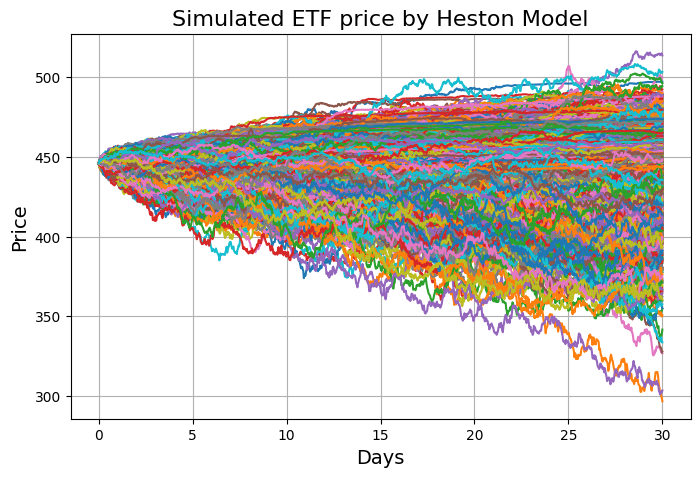

In [640]:
days=np.linspace(0,30,1001)
plt.figure(figsize=(8,5))
plt.plot(days,S)
plt.grid(True)
plt.title('Simulated ETF price by Heston Model',fontdict={'size':16})
plt.xlabel('Days',fontdict={'size':14})
plt.ylabel('Price',fontdict={'size':14})
plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/ETFHESTONPRICE.png',dpi=300)

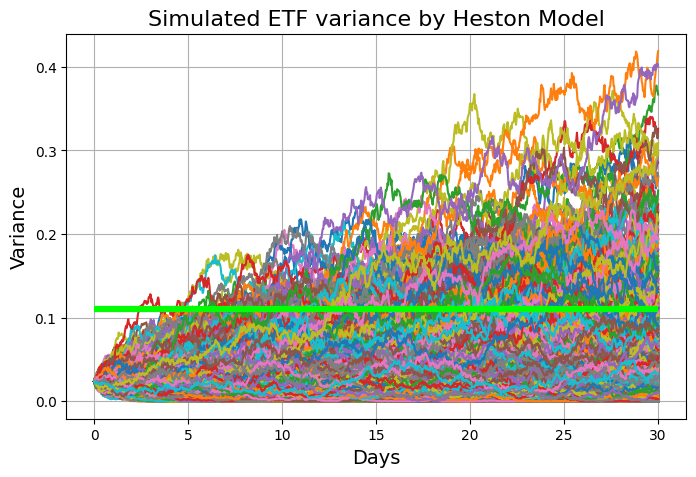

In [639]:
days=np.linspace(0,30,1001)
plt.figure(figsize=(8,5))
plt.plot(days,V)
plt.grid(True)
plt.hlines(theta,0,30,color="lime",linewidth=4.5)
plt.title('Simulated ETF variance by Heston Model',fontdict={'size':16})
plt.xlabel('Days',fontdict={'size':14})
plt.ylabel('Variance',fontdict={'size':14})
plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/ETFHESTONVAR.png',dpi=300)

In [223]:
def simulate_price_GBM(S0,T,N,M,theta,r):
    #arrays to store variance and ETF prices
    S_t=np.empty((N+1,M))
    S_t[0]=S0

    dt=T/N
    #np.random.seed(0)
    
    for i in range(1,N+1):
        rand = np.random.standard_normal(M)
        S_t[i]=S_t[i-1]*np.exp((r-0.5*theta)*dt+np.sqrt(dt)*np.sqrt(theta)*rand)
    return S_t


In [544]:
#heston model parameters
S0=445.91    #spot price
T=1.0/12.0        #simulate 1 month
N=1000        #time step
M=3000       #simulate 3000 paths
theta=0.11


S_GBM=simulate_price_GBM(S0,T,N,M,theta,risk_free_rate)

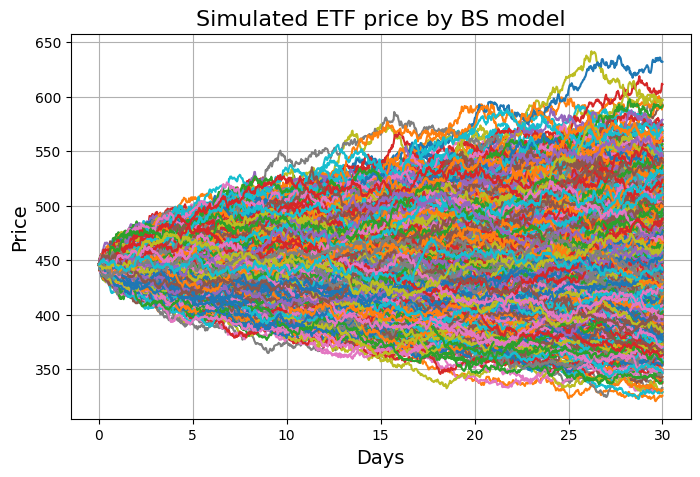

In [638]:
days=np.linspace(0,30,1001)
plt.figure(figsize=(8,5))
plt.plot(days,S_GBM)
plt.grid(True)
plt.title('Simulated ETF price by BS model',fontdict={'size':16})
plt.xlabel('Days',fontdict={'size':14})
plt.ylabel('Price',fontdict={'size':14})
plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/ETFBSPRICE.png',dpi=300)

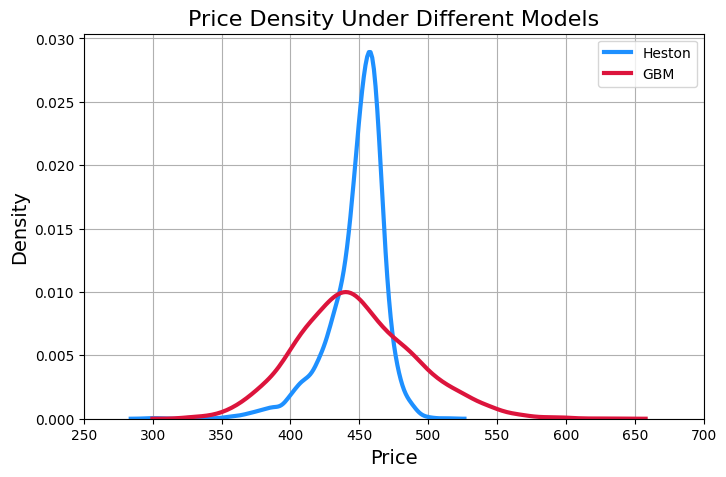

In [647]:
plt.figure(figsize=(8,5))
sns.kdeplot(S[-1], label="Heston",lw=3,color='dodgerblue')#kernel density
sns.kdeplot(S_GBM[-1], label="GBM",lw=3,color='crimson')


plt.title('Price Density Under Different Models',fontdict={'size':16})

plt.xlim([250, 700])
plt.xlabel('Price',fontdict={'size':14})
plt.ylabel('Density',fontdict={'size':14})
plt.grid(True)
plt.legend()

plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/density.png',dpi=300)
plt.show()

In [524]:
meanprice=np.mean(S[-1,:])# heston simulate mean
medianprice=np.median(S[-1,:])#heston simulate median

meanvar=np.mean(V[-1,:])#heston simulate var mean
medianvar=np.median(V[-1,:])#heston simulate var median
numbervar=np.sum(V[-1,:]>0.113)#count var>theta
sim_summary=[meanprice,medianprice,meanvar,medianvar,numbervar]

In [602]:
meanpricebs=np.mean(S_GBM[-1,:])#bs simulate mean
medianpricebs=np.median(S_GBM[-1,:])#bs simulate median
sim_summary_bs=[meanpricebs,medianpricebs]
a=kurtosis(S_GBM[-1,:], fisher=True)#bs kurtosis
b=kurtosis(S[-1,:], fisher=True)#heston kurtosis

stdheston=np.std(S[-1,:])#heston simulate std
stdbs=np.std(S_GBM[-1,:])#bs simulate std
numberheston=np.sum((S[-1,:]>428) & (S[-1,:]<468))#numebr within 1 std
numbergbm=np.sum((S_GBM[-1,:]>405) & (S_GBM[-1,:]<489))#numebr within 1 std

normheston= kstest(S[-1,:], 'norm')#kstest
normbs=kstest(S_GBM[-1,:],'norm')#kstest

statistic, hestonskew =skewtest(S[-1,:])#skewtest
statistic, bsskew=skewtest(S_GBM[-1,:])#skewtest
d=np.sum(S_GBM[-1,:]>445.91)#count price >spot price

In [595]:
a=np.percentile(S[-1,:],5)


VaR_heston_5=np.percentile(S[-1,:],5)-445.91 #heston 5% var
VaR_heston_1=np.percentile(S[-1,:],1)-445.91 #heston 1% var


VaR_GBM_5=np.percentile(S_GBM[-1,:],5)-445.91 #BS 5% var
VaR_GBM_1=np.percentile(S_GBM[-1,:],1)-445.91 #BS 1% var

In [ ]:
spy=pd.read_csv(r'C:\Users\Ye\Desktop\Imperial\AP\SPY_OPT_FULL.csv')
#some descriptive work, c is call option, p is put option
c_rows = spy[spy['type'] == 'c']
cmean = np.mean(c_rows['Last Price'])
p_rows=spy[spy['type']=='p']
pmean=np.mean(p_rows['Last Price'])
cstd=np.std(c_rows['Last Price'])
pstd=np.std(p_rows['Last Price'])
c_median=np.median(c_rows['Last Price'])
p_median=np.median(p_rows['Last Price'])
c_min=np.min(c_rows['Last Price'])
p_min=np.min(p_rows['Last Price'])
c_max=np.max(c_rows['Last Price'])
p_max=np.max(p_rows['Last Price'])

c_vol_mean=np.mean(c_rows['Impl. Volatility'])
p_vol_mean=np.mean(p_rows['Impl. Volatility'])
c_vol_max=np.max(c_rows['Impl. Volatility'])
p_vol_max=np.max(p_rows['Impl. Volatility'])
c_vol_min=np.min(c_rows['Impl. Volatility'])
p_vol_min=np.min(p_rows['Impl. Volatility'])

In [596]:
heston_extreme_value5=S[-1,:][S[-1,:]<np.percentile(S[-1,:],5)]-445.91
#extreme_value1=S_GBM[-1,:][S_GBM[-1,:]<np.percentile(S[-1,:],0.05)]
#extreme_value2=S[1000][np.where(S[1000]<np.percentile(S[-1,:],5))]
heston_expected_shortfall_5=heston_extreme_value5.mean()# 5% ES heston

heston_extreme_value1=S[-1,:][S[-1,:]<np.percentile(S[-1,:],1)]-445.91
heston_expected_shortfall_1=heston_extreme_value1.mean() # 1% ES heston




gbm_extreme_value5=S_GBM[-1,:][S_GBM[-1,:]<np.percentile(S_GBM[-1,:],5)]-445.91
gbm_expected_shortfall_5=gbm_extreme_value5.mean()# 5% ES BS

gbm_extreme_value1=S_GBM[-1,:][S_GBM[-1,:]<np.percentile(S_GBM[-1,:],1)]-445.91
gbm_expected_shortfall_1=gbm_extreme_value1.mean() #1% ES BS

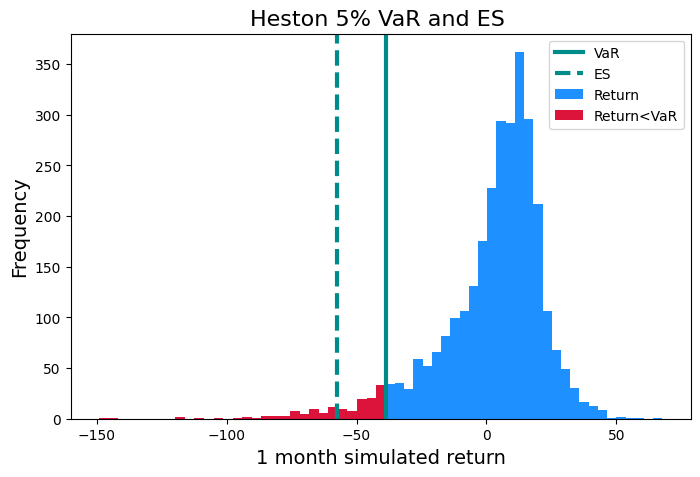

In [650]:
heston_return=S[-1,:]-445.91
gbm_return=S_GBM[-1,:]-445.91
plt.figure(figsize=(8,5))
#5% VaR and ES under heston model
plt.hist(heston_return[heston_return > VaR_heston_5], bins=30,color='dodgerblue')
plt.hist(heston_return[heston_return <= VaR_heston_5], bins=30,color='crimson')
plt.axvline(VaR_heston_5, color='darkcyan', linestyle='solid',lw=3)
plt.axvline(heston_expected_shortfall_5, color='darkcyan', linestyle='--',lw=3)
plt.legend(['VaR', 'ES', 'Return','Return<VaR'])
plt.title(r'Heston 5% VaR and ES ',fontdict={'size':16})
plt.xlabel('1 month simulated return',fontdict={'size':14})
plt.ylabel('Frequency',fontdict={'size':14})
plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/heston5.png',dpi=300)

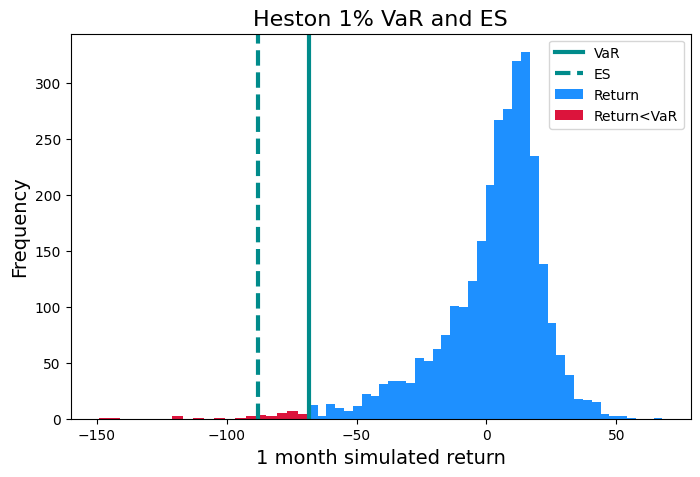

In [651]:
#1% VaR and ES under heston model
plt.figure(figsize=(8,5))
plt.hist(heston_return[heston_return>VaR_heston_1],bins=40,color='dodgerblue')
plt.hist(heston_return[heston_return<=VaR_heston_1],bins=20,color='crimson')
plt.axvline(VaR_heston_1,color='darkcyan',linestyle='-',lw=3)
plt.axvline(heston_expected_shortfall_1,color='darkcyan',lw=3,linestyle='--')
plt.legend(['VaR','ES','Return','Return<VaR'])
plt.title('Heston 1% VaR and ES',fontdict={'size':16})
plt.xlabel('1 month simulated return',fontdict={'size':14})
plt.ylabel('Frequency',fontdict={'size':14})
plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/heston1.png',dpi=300)

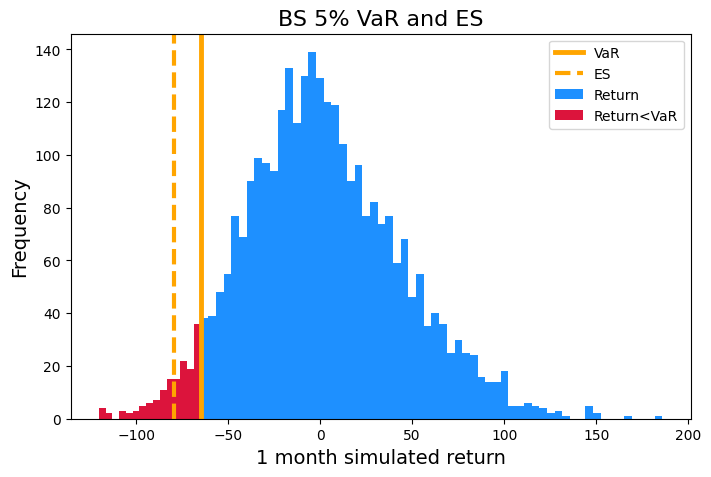

In [653]:
#5% VaR and ES under GBM
plt.figure(figsize=(8,5))
plt.hist(gbm_return[gbm_return>VaR_GBM_5],bins=60,color='dodgerblue')
plt.hist(gbm_return[gbm_return<=VaR_GBM_5],bins=15,color='crimson')
plt.axvline(VaR_GBM_5,color='orange',lw=3.5,linestyle='-')
plt.axvline(gbm_expected_shortfall_5,color='orange',lw=3,linestyle='--')
plt.legend(['VaR','ES','Return','Return<VaR'])
plt.title('BS 5% VaR and ES',fontdict={'size':16})
plt.xlabel('1 month simulated return',fontdict={'size':14})
plt.ylabel('Frequency',fontdict={"size":14})
plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/BS5.png',dpi=300)

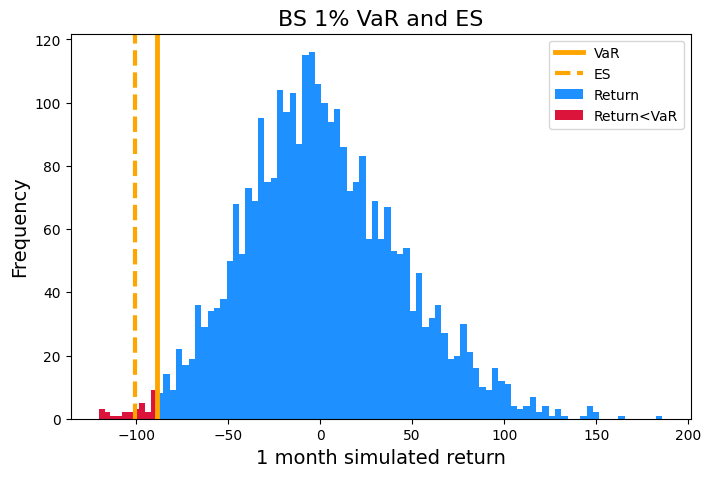

In [654]:
plt.figure(figsize=(8,5))
plt.hist(gbm_return[gbm_return>VaR_GBM_1],color='dodgerblue',bins=80)
plt.hist(gbm_return[gbm_return<=VaR_GBM_1],color='crimson',bins=10)
plt.axvline(VaR_GBM_1,color='orange',lw=3.5,linestyle='-')
plt.axvline(gbm_expected_shortfall_1,color='orange',linestyle='--',lw=3)
plt.title('BS 1% VaR and ES', fontdict={'size':16})
plt.xlabel('1 month simulated return',fontdict={'size':14})
plt.ylabel('Frequency',fontdict={'size':14})
plt.legend(['VaR','ES','Return','Return<VaR'])
plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/BS1.png',dpi=300)

In [611]:
spy=pd.read_csv(r'C:\Users\Ye\Desktop\Imperial\AP\SPY_OPT_FULL.csv')
c_rows = spy[spy['type'] == 'c']
cmean = np.mean(c_rows['Last Price'])
p_rows=spy[spy['type']=='p']
pmean=np.mean(p_rows['Last Price'])
cstd=np.std(c_rows['Last Price'])
pstd=np.std(p_rows['Last Price'])
c_median=np.median(c_rows['Last Price'])
p_median=np.median(p_rows['Last Price'])
c_min=np.min(c_rows['Last Price'])
p_min=np.min(p_rows['Last Price'])
c_max=np.max(c_rows['Last Price'])
p_max=np.max(p_rows['Last Price'])

c_vol_mean=np.mean(c_rows['Impl. Volatility'])
p_vol_mean=np.mean(p_rows['Impl. Volatility'])
c_vol_max=np.max(c_rows['Impl. Volatility'])
p_vol_max=np.max(p_rows['Impl. Volatility'])
c_vol_min=np.min(c_rows['Impl. Volatility'])
p_vol_min=np.min(p_rows['Impl. Volatility'])


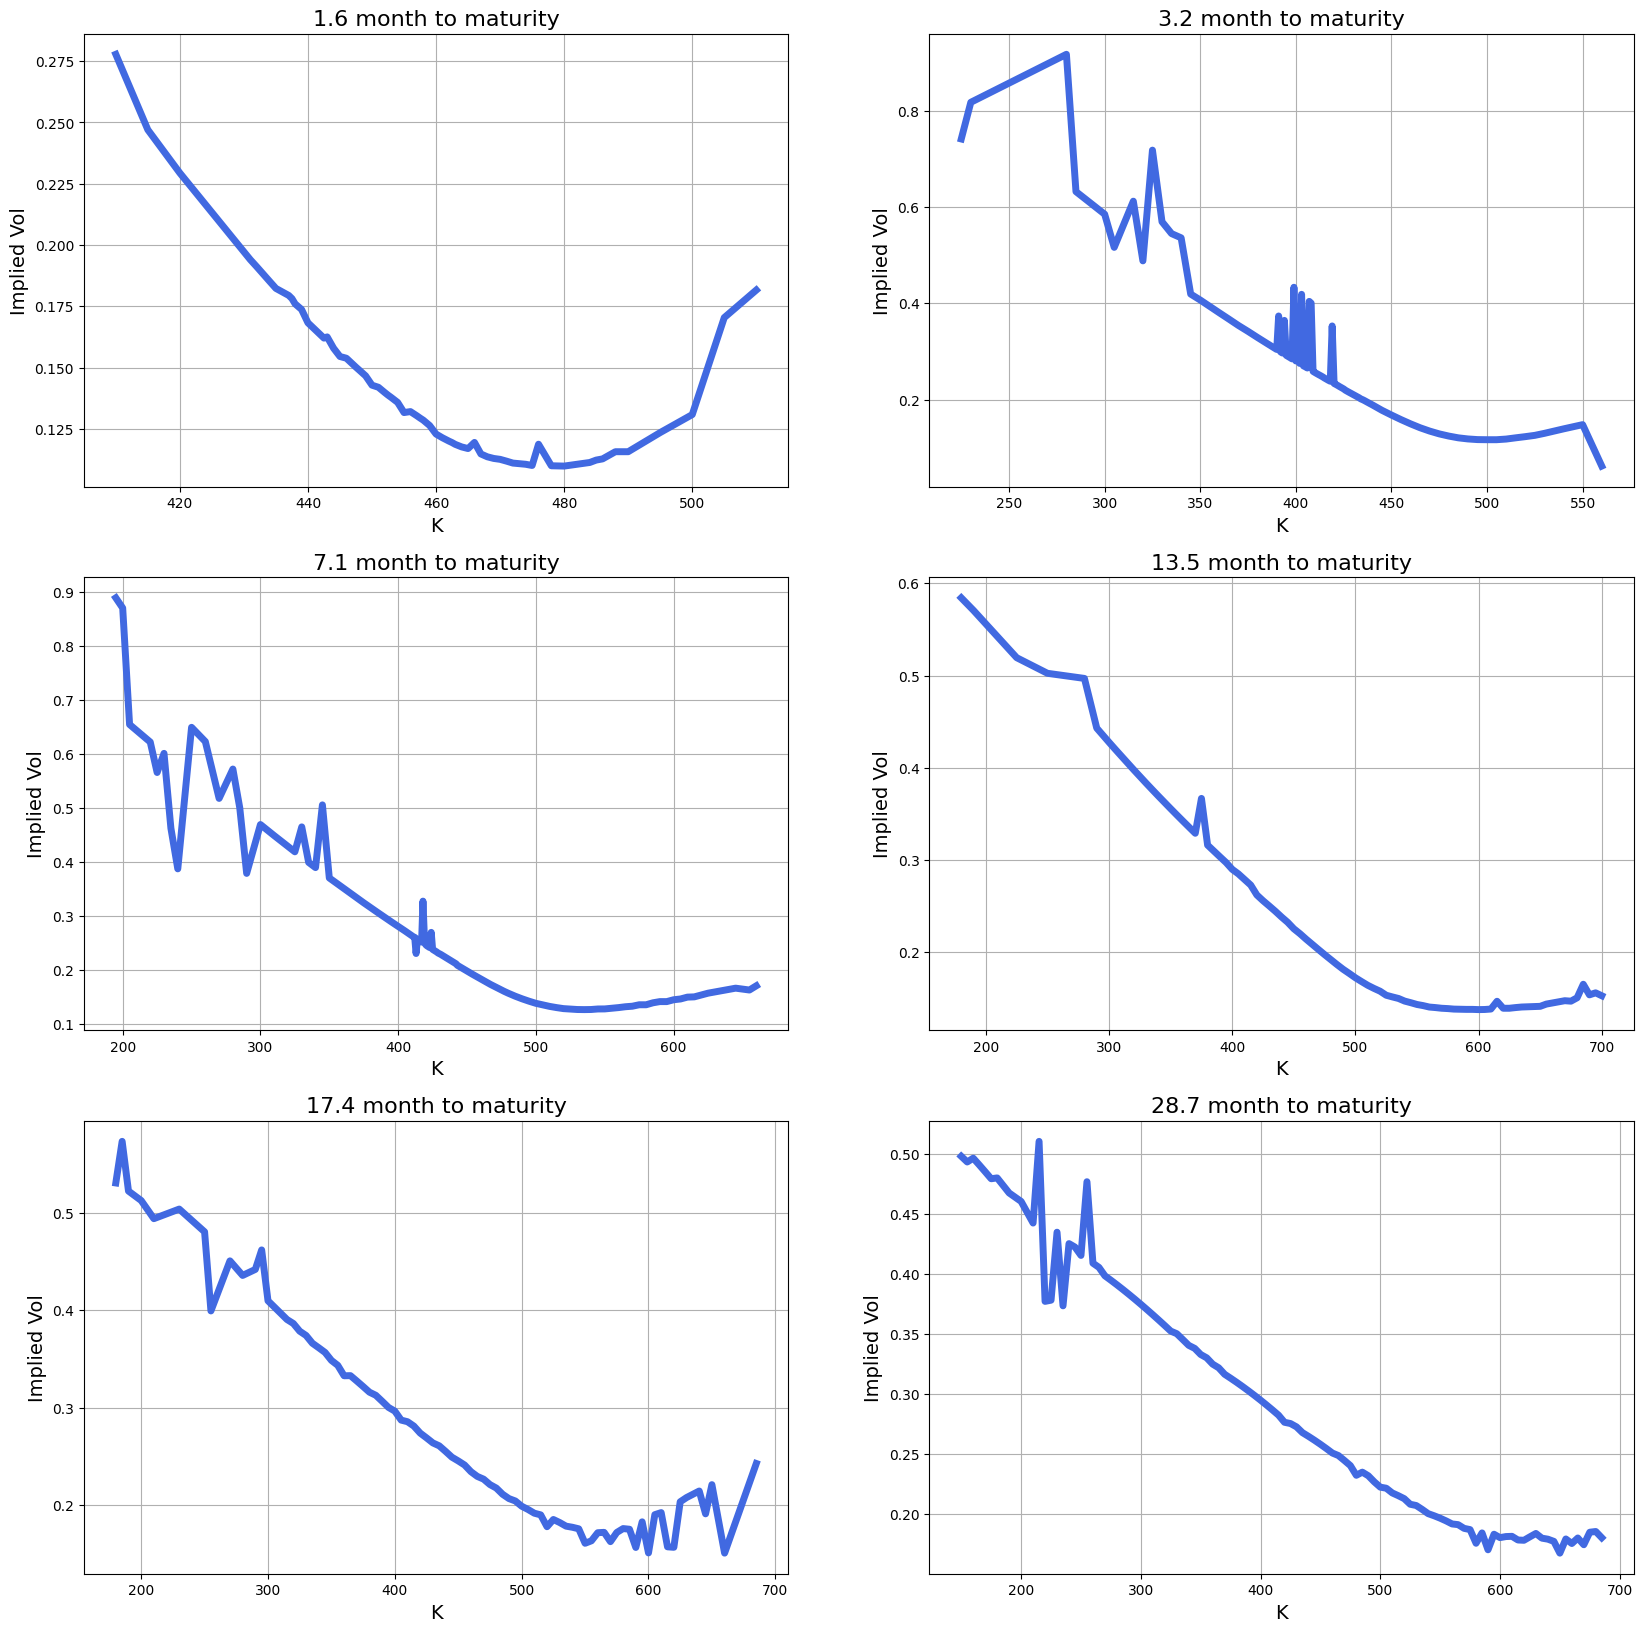

In [622]:
c_922 = spy[(spy['type'] == 'c') & (spy['maturity_date'] == '2023/9/22')]
c_1117 = spy[(spy['type'] == 'c') & (spy['maturity_date'] == '2023/11/17')]
c_315 = spy[(spy['type'] == 'c') & (spy['maturity_date'] == '2024/3/15')]
c_920 = spy[(spy['type'] == 'c') & (spy['maturity_date'] == '2024/9/20')]
c_117 = spy[(spy['type'] == 'c') & (spy['maturity_date'] == '2025/1/17')]
c_1219 = spy[(spy['type'] == 'c') & (spy['maturity_date'] == '2025/12/19')]
fig, ((p1,p2),(p3,p4),(p5,p6))  = plt.subplots(3, 2, figsize=(20,20))
p1.plot(c_922['K'],c_922['Impl. Volatility'],lw=5,color='royalblue')
p1.set_title('1.6 month to maturity',fontdict={'size':16})
p1.set_xlabel('K',fontdict={'size':14})
p1.set_ylabel('Implied Vol',fontdict={'size':14})
p1.grid(True)

p2.plot(c_1117['K'],c_1117['Impl. Volatility'],lw=5,color='royalblue')
p2.set_title('3.2 month to maturity',fontdict={'size':16})
p2.set_xlabel('K',fontdict={'size':14})
p2.set_ylabel('Implied Vol',fontdict={'size':14})
p2.grid(True)

p3.plot(c_315['K'],c_315['Impl. Volatility'],lw=5,color='royalblue')
p3.set_title('7.1 month to maturity',fontdict={'size':16})
p3.set_xlabel('K',fontdict={'size':14})
p3.set_ylabel('Implied Vol',fontdict={'size':14})
p3.grid(True)

p4.plot(c_920['K'],c_920['Impl. Volatility'],lw=5,color='royalblue')
p4.set_title('13.5 month to maturity',fontdict={'size':16})
p4.set_xlabel('K',fontdict={'size':14})
p4.set_ylabel('Implied Vol',fontdict={'size':14})
p4.grid(True)

p5.plot(c_117['K'],c_117['Impl. Volatility'],lw=5,color='royalblue')
p5.set_title('17.4 month to maturity',fontdict={'size':16})
p5.set_xlabel('K',fontdict={'size':14})
p5.set_ylabel('Implied Vol',fontdict={'size':14})
p5.grid(True)

p6.plot(c_1219['K'],c_1219['Impl. Volatility'],lw=5,color='royalblue')
p6.set_title('28.7 month to maturity',fontdict={'size':16})
p6.set_xlabel('K',fontdict={'size':14})
p6.set_ylabel('Implied Vol',fontdict={'size':14})
p6.grid(True)

plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/impliedvolcall.eps')

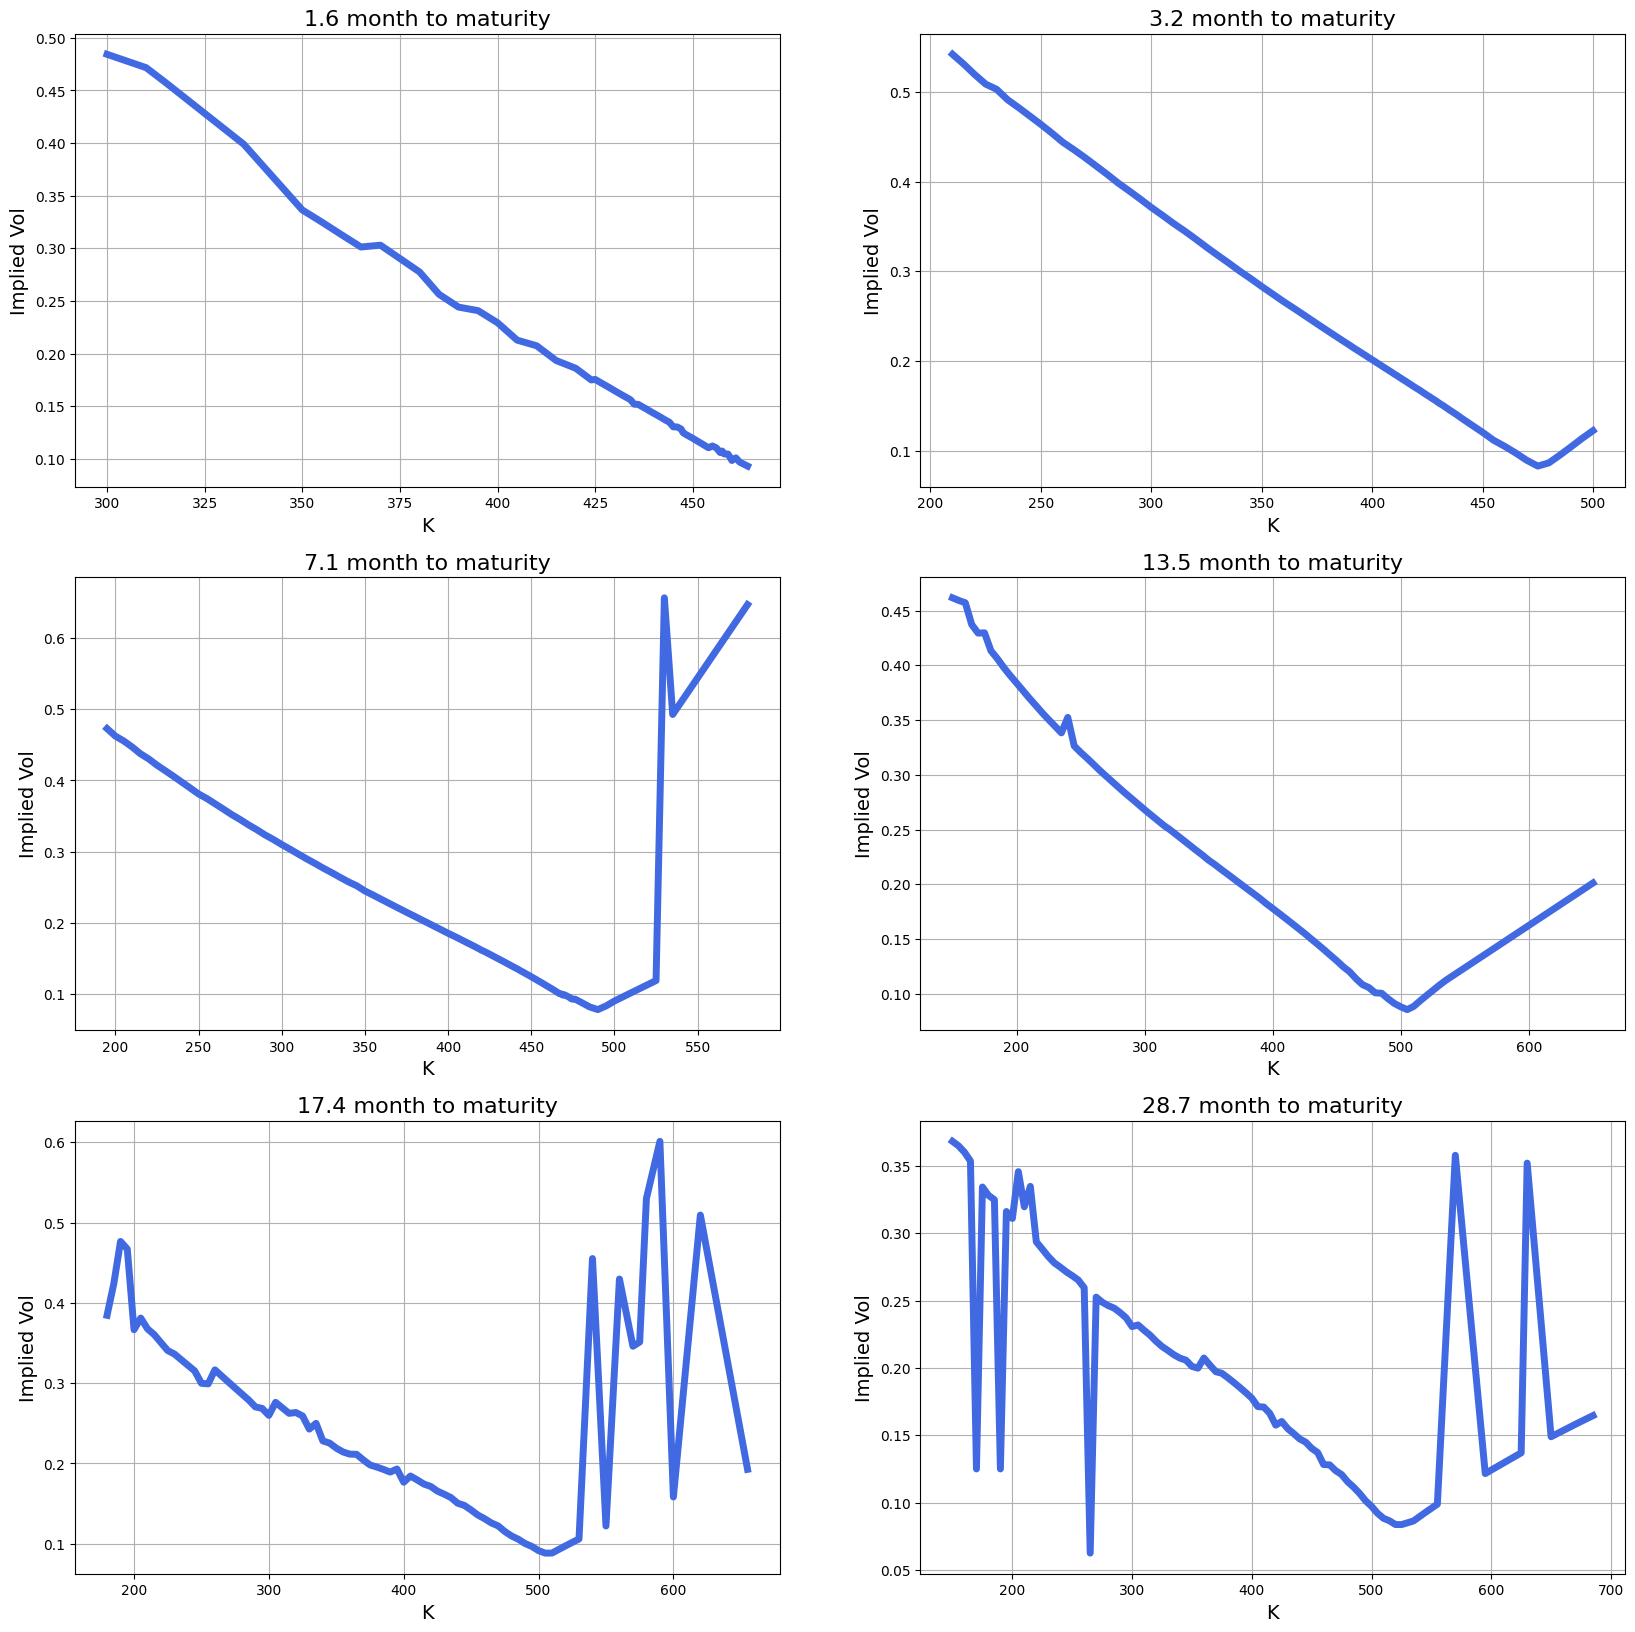

In [623]:
p_922 = spy[(spy['type'] == 'p') & (spy['maturity_date'] == '2023/9/22')]
p_1117 = spy[(spy['type'] == 'p') & (spy['maturity_date'] == '2023/11/17')]
p_315 = spy[(spy['type'] == 'p') & (spy['maturity_date'] == '2024/3/15')]
p_920 = spy[(spy['type'] == 'p') & (spy['maturity_date'] == '2024/9/20')]
p_117 = spy[(spy['type'] == 'p') & (spy['maturity_date'] == '2025/1/17')]
p_1219 = spy[(spy['type'] == 'p') & (spy['maturity_date'] == '2025/12/19')]
fig, ((p1,p2),(p3,p4),(p5,p6))  = plt.subplots(3, 2, figsize=(20,20))
p1.plot(p_922['K'],p_922['Impl. Volatility'],lw=5,color='royalblue')
p1.set_title('1.6 month to maturity',fontdict={'size':16})
p1.set_xlabel('K',fontdict={'size':14})
p1.set_ylabel('Implied Vol',fontdict={'size':14})
p1.grid(True)

p2.plot(p_1117['K'],p_1117['Impl. Volatility'],lw=5,color='royalblue')
p2.set_title('3.2 month to maturity',fontdict={'size':16})
p2.set_xlabel('K',fontdict={'size':14})
p2.set_ylabel('Implied Vol',fontdict={'size':14})
p2.grid(True)

p3.plot(p_315['K'],p_315['Impl. Volatility'],lw=5,color='royalblue')
p3.set_title('7.1 month to maturity',fontdict={'size':16})
p3.set_xlabel('K',fontdict={'size':14})
p3.set_ylabel('Implied Vol',fontdict={'size':14})
p3.grid(True)

p4.plot(p_920['K'],p_920['Impl. Volatility'],lw=5,color='royalblue')
p4.set_title('13.5 month to maturity',fontdict={'size':16})
p4.set_xlabel('K',fontdict={'size':14})
p4.set_ylabel('Implied Vol',fontdict={'size':14})
p4.grid(True)

p5.plot(p_117['K'],p_117['Impl. Volatility'],lw=5,color='royalblue')
p5.set_title('17.4 month to maturity',fontdict={'size':16})
p5.set_xlabel('K',fontdict={'size':14})
p5.set_ylabel('Implied Vol',fontdict={'size':14})
p5.grid(True)

p6.plot(p_1219['K'],p_1219['Impl. Volatility'],lw=5,color='royalblue')
p6.set_title('28.7 month to maturity',fontdict={'size':16})
p6.set_xlabel('K',fontdict={'size':14})
p6.set_ylabel('Implied Vol',fontdict={'size':14})
p6.grid(True)

plt.savefig('C:/Users/Ye/Desktop/Imperial/AP/impliedvolput.eps')